In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from tqdm import tqdm

import hrv_analysis as hrv
import optical_gating_analysis as OG

import j_py_sad_correlation as jps

import tifffile as tf
import glob

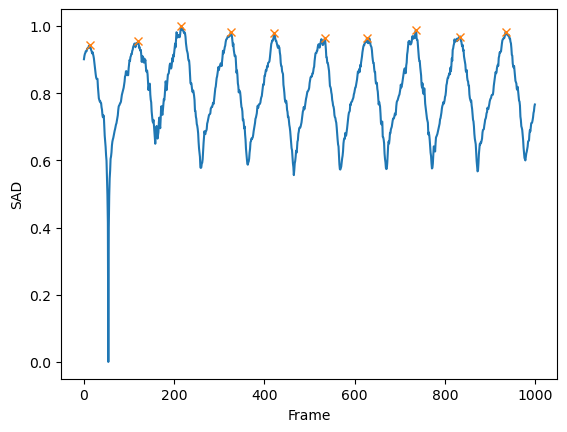

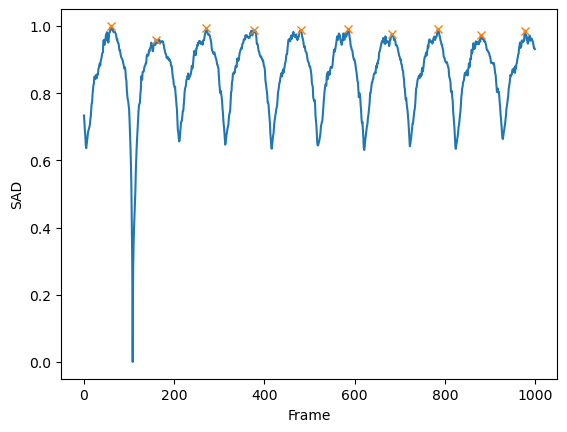

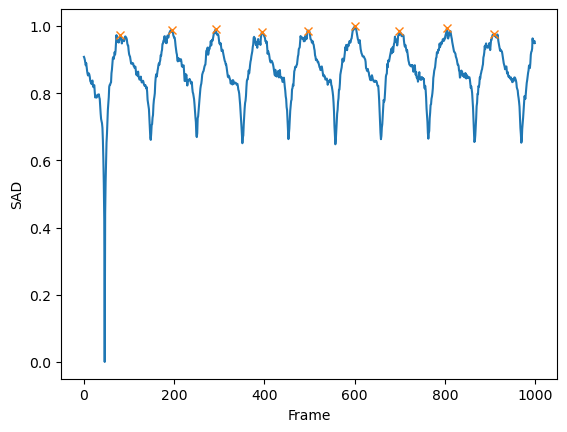

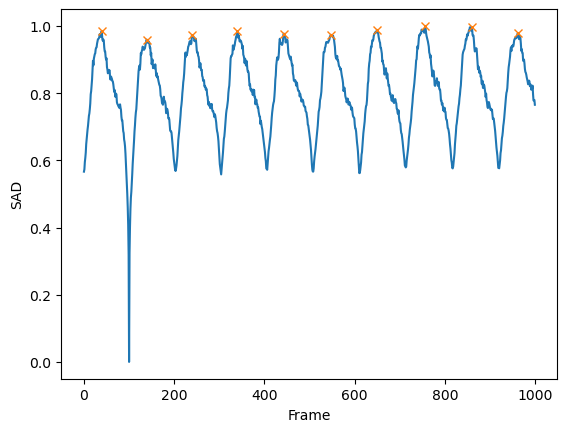

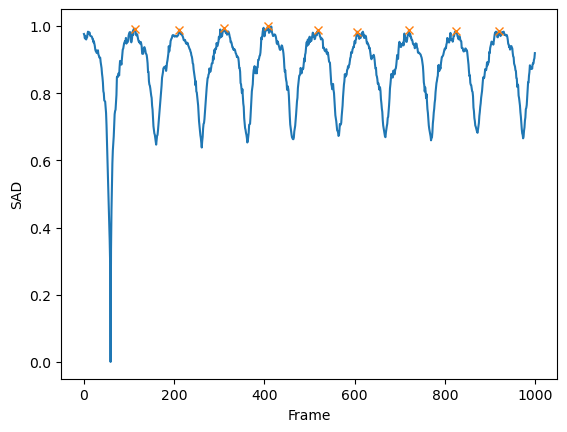

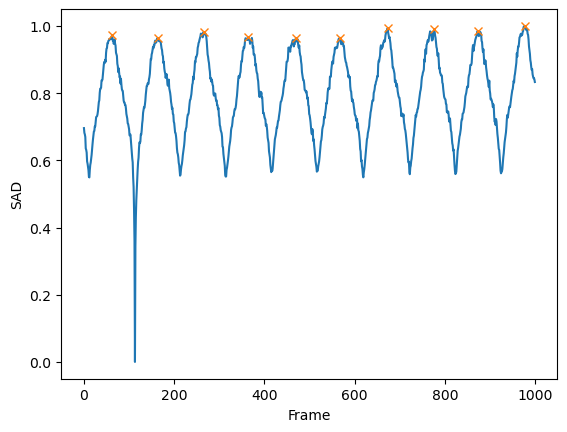

KeyboardInterrupt: 

In [47]:
files_src = r"E:\data\my data\June 2024 imaging\Day1 variability healthy 30mins\first fish\2024-06-19 14.56.40 vid\Allied Vision Technologies GS650 0001f61c\*tif"
files = glob.glob(files_src)
for file in files:
    oog = OG.BasicOpticalGating()
    oog.settings["show_status"] = False
    oog.settings["progress_bars"] = False
    oog.sequence_manager.set_source(file)
    oog.run()
    data = tf.imread(file)
    sad_curve = jps.sad_with_references(oog.sequence_manager.reference_sequence[54-27], data)
    sad_curve -= np.min(sad_curve)
    sad_curve /= np.max(sad_curve)
    hrs1 = hrv.get_hr_from_sad(sad_curve, 0.7, distance = 30, prominence = 0.04, plot_sad = False)
    sad_curve = jps.sad_with_references(oog.sequence_manager.reference_sequence[54+27], data)
    sad_curve -= np.min(sad_curve)
    sad_curve /= np.max(sad_curve)
    hrs2 = hrv.get_hr_from_sad(sad_curve, 0.7, distance = 30, prominence = 0.04, plot_sad = False)

    hrs1 = hrs1[0:np.min([len(hrs1), len(hrs2)])]
    hrs2 = hrs2[0:len(hrs1)]

    c = np.empty((hrs1.size + hrs2.size,), dtype=hrs1.dtype)
    c[0::2] = hrs1
    c[1::2] = hrs2
    #plt.scatter(np.diff(c)[:-1:2], np.diff(c)[1::2])

In [30]:
oog = OG.BasicOpticalGating().default()
oog.run()
print(oog.sequence_manager.reference_period)

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif


Getting SADs: 100%|█████████▉| 1106/1107 [00:01<00:00, 605.95it/s]


Getting phases
35.77851226661945


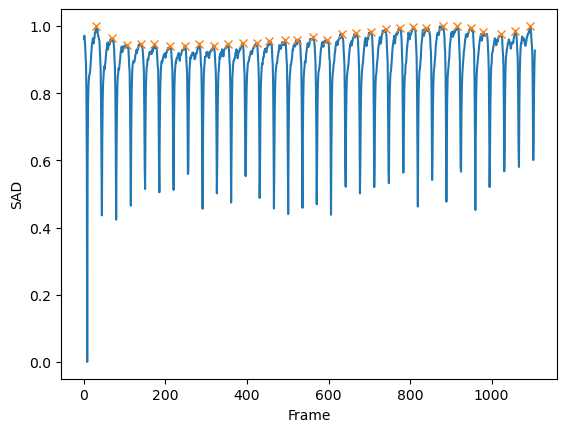

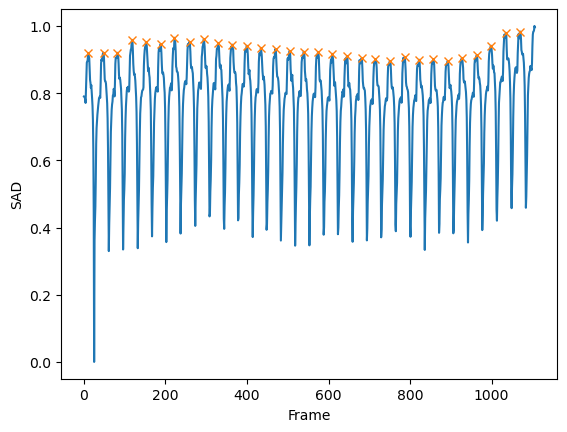

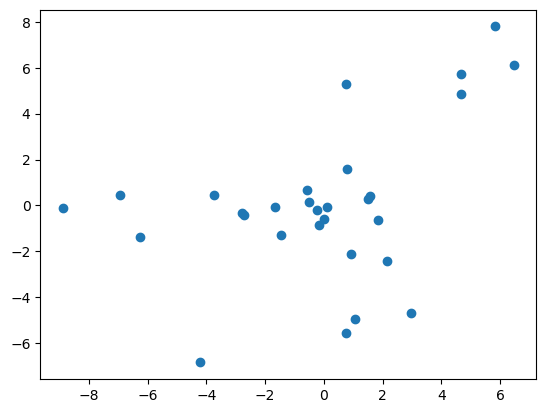

In [33]:
data = tf.imread(r"D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif")
sad_curve = jps.sad_with_references(oog.sequence_manager.reference_sequence[0], data)
sad_curve -= np.min(sad_curve)
sad_curve /= np.max(sad_curve)
hrs1 = hrv.get_hr_from_sad(sad_curve, 0.8)
sad_curve = jps.sad_with_references(oog.sequence_manager.reference_sequence[17], data)
sad_curve -= np.min(sad_curve)
sad_curve /= np.max(sad_curve)
hrs2 = hrv.get_hr_from_sad(sad_curve, 0.8)

c = np.empty((hrs1.size + hrs2.size,), dtype=hrs1.dtype)
c[0::2] = hrs1
c[1::2] = hrs2
plt.scatter(np.diff(c)[:-1:2], np.diff(c)[1::2])
plt.show()